This practice introduces the problem of **overfitting** and its resolution by two basic **regularization** techniques.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

### Data preprocessing
The data we will use is the IMDB movie review data we saw previously.

In [4]:
vocabSize = 10000
pack = keras.datasets.imdb.load_data(num_words=vocabSize)
(trainData, trainLabels), (testData, testLabels) = pack

Recall that each data is an `int` repsentation of a review.

In [8]:
print(trainData[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Let's encode the reviews into multi-hot vectors.

In [12]:
def multiHotEncode(sequences, dim):
    code = np.zeros((len(sequences), dim))
    for i, wordIdx in enumerate(sequences):
        code[i, wordIdx] = 1
    return code

trainData = multiHotEncode(trainData, vocabSize)
testData = multiHotEncode(testData, vocabSize)

Now each preprocessed data looks like

[0. 1. 1. ... 0. 0. 0.]


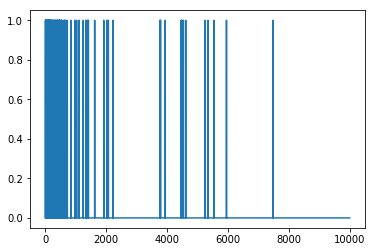

In [18]:
print(trainData[0])
_ = plt.plot(trainData[0])

Because the word indices are sorted by frequency, words with smaller indices are more likely to have 1 in the reviews.

### The baseline model

In [19]:
baseline = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(vocabSize,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
baseline.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])
baseline.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
baselineHistory = baseline.fit(trainData,
                               trainLabels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(testData, testLabels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 21s - loss: 0.4900 - accuracy: 0.8071 - binary_crossentropy: 0.4900 - val_loss: 0.3499 - val_accuracy: 0.8738 - val_binary_crossentropy: 0.3499
Epoch 2/20
25000/25000 - 18s - loss: 0.2590 - accuracy: 0.9102 - binary_crossentropy: 0.2590 - val_loss: 0.2881 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2881
Epoch 3/20
25000/25000 - 17s - loss: 0.1891 - accuracy: 0.9334 - binary_crossentropy: 0.1891 - val_loss: 0.2885 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2885
Epoch 4/20
25000/25000 - 17s - loss: 0.1531 - accuracy: 0.9470 - binary_crossentropy: 0.1531 - val_loss: 0.3140 - val_accuracy: 0.8767 - val_binary_crossentropy: 0.3140
Epoch 5/20
25000/25000 - 17s - loss: 0.1269 - accuracy: 0.9578 - binary_crossentropy: 0.1269 - val_loss: 0.3314 - val_accuracy: 0.8756 - val_binary_crossentropy: 0.3314
Epoch 6/20
25000/25000 - 17s - loss: 0.1063 - accuracy: 0.9669 - binary_crossentropy: 0.1063 - val_loss: 

### Smaller model

In [21]:
small = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(vocabSize,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
small.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])
small.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [22]:
smallHistory = small.fit(trainData,
                         trainLabels,
                         epochs=20,
                         batch_size=512,
                         validation_data=(testData, testLabels),
                         verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 17s - loss: 0.6182 - accuracy: 0.7128 - binary_crossentropy: 0.6182 - val_loss: 0.5245 - val_accuracy: 0.8514 - val_binary_crossentropy: 0.5245
Epoch 2/20
25000/25000 - 17s - loss: 0.4288 - accuracy: 0.8810 - binary_crossentropy: 0.4288 - val_loss: 0.3930 - val_accuracy: 0.8761 - val_binary_crossentropy: 0.3930
Epoch 3/20
25000/25000 - 17s - loss: 0.3144 - accuracy: 0.9056 - binary_crossentropy: 0.3144 - val_loss: 0.3297 - val_accuracy: 0.8834 - val_binary_crossentropy: 0.3297
Epoch 4/20
25000/25000 - 17s - loss: 0.2506 - accuracy: 0.9208 - binary_crossentropy: 0.2506 - val_loss: 0.2988 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2988
Epoch 5/20
25000/25000 - 19s - loss: 0.2099 - accuracy: 0.9331 - binary_crossentropy: 0.2099 - val_loss: 0.2865 - val_accuracy: 0.8871 - val_binary_crossentropy: 0.2865
Epoch 6/20
25000/25000 - 19s - loss: 0.1823 - accuracy: 0.9418 - binary_crossentropy: 0.1823 - val_loss: 

### Bigger model

In [23]:
big = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(vocabSize,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
big.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])
big.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [25]:
bigHistory = big.fit(trainData,
                     trainLabels,
                     epochs=20,
                     batch_size=512,
                     validation_data=(testData, testLabels),
                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 33s - loss: 0.3401 - accuracy: 0.8563 - binary_crossentropy: 0.3401 - val_loss: 0.2963 - val_accuracy: 0.8800 - val_binary_crossentropy: 0.2963
Epoch 2/20
25000/25000 - 35s - loss: 0.1434 - accuracy: 0.9486 - binary_crossentropy: 0.1434 - val_loss: 0.3357 - val_accuracy: 0.8715 - val_binary_crossentropy: 0.3357
Epoch 3/20
25000/25000 - 35s - loss: 0.0491 - accuracy: 0.9858 - binary_crossentropy: 0.0491 - val_loss: 0.4547 - val_accuracy: 0.8675 - val_binary_crossentropy: 0.4547
Epoch 4/20
25000/25000 - 33s - loss: 0.0088 - accuracy: 0.9984 - binary_crossentropy: 0.0088 - val_loss: 0.5836 - val_accuracy: 0.8672 - val_binary_crossentropy: 0.5836
Epoch 5/20
25000/25000 - 32s - loss: 0.0011 - accuracy: 1.0000 - binary_crossentropy: 0.0011 - val_loss: 0.6924 - val_accuracy: 0.8700 - val_binary_crossentropy: 0.6924
Epoch 6/20
25000/25000 - 33s - loss: 2.5338e-04 - accuracy: 1.0000 - binary_crossentropy: 2.5338e-04 - va

Let's compare the three models' loss profiles.

In [26]:
def plotHistory(histories, key='binary_crossentropy'):
    plt.figure(figsize=(8,5))
    for name, history in histories:
        line, = plt.plot(history.epoch,
                         history.history['val_'+key],
                         '--',
                         label=name.title() + ' val')
        plt.plot(history.epoch,
                 history.history[key],
                 color=line.get_color(),
                 label=name.title() + ' train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

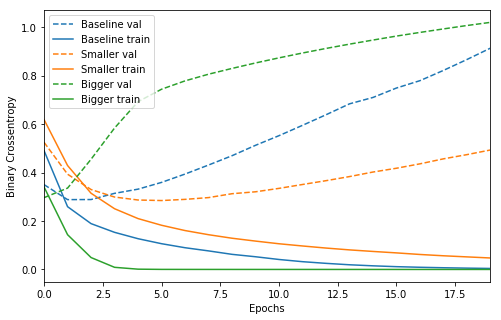

In [27]:
plotHistory([('baseline', baselineHistory),
             ('smaller', smallHistory),
             ('bigger', bigHistory)])

As the profile shows, the bigger model overfits almost right away, after just one epoch, though it fits the training data sooner.

### Weight regularization
Weight regularziation regularizes the distribution of model parameters so that they have small values. Weight refularization is done by adding to the loss function a **cost** associated with having large weights. The two types of the cost are as follows:
- **L1 regularization.** The cost added is proportional to the absolute value of weight coefficients. Introduces *sparsity* to make some of the weight parameters zero.
- **L2 regularization.** The cost added is proportional to the square of the weight coefficients. Penalizes weights without making them sparse. Also called *weight decay*.

In `tensorflow.keras`, weight regularization is introduced by passing weight regularizer instances to layers.

In [30]:
l2Model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(vocabSize,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2Model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

l2History = l2Model.fit(trainData, trainLabels,
                        epochs=20,
                        batch_size=256,
                        validation_data=(testData, testLabels),
                        verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4561 - accuracy: 0.8401 - binary_crossentropy: 0.4155 - val_loss: 0.3377 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2917
Epoch 2/20
25000/25000 - 3s - loss: 0.2774 - accuracy: 0.9177 - binary_crossentropy: 0.2262 - val_loss: 0.3378 - val_accuracy: 0.8855 - val_binary_crossentropy: 0.2837
Epoch 3/20
25000/25000 - 3s - loss: 0.2420 - accuracy: 0.9326 - binary_crossentropy: 0.1851 - val_loss: 0.3545 - val_accuracy: 0.8808 - val_binary_crossentropy: 0.2961
Epoch 4/20
25000/25000 - 3s - loss: 0.2297 - accuracy: 0.9398 - binary_crossentropy: 0.1691 - val_loss: 0.3750 - val_accuracy: 0.8758 - val_binary_crossentropy: 0.3125
Epoch 5/20
25000/25000 - 3s - loss: 0.2174 - accuracy: 0.9441 - binary_crossentropy: 0.1540 - val_loss: 0.3928 - val_accuracy: 0.8712 - val_binary_crossentropy: 0.3281
Epoch 6/20
25000/25000 - 3s - loss: 0.2068 - accuracy: 0.9485 - binary_crossentropy: 0.1413 - val_loss: 0.4110

The (first) argument of `keras.regularizers.l2` is the `scale` parameter. The squares of weight coefficients are multiplied by `scale` and added to the loss.

Let's see the effect of the L2 regularization.

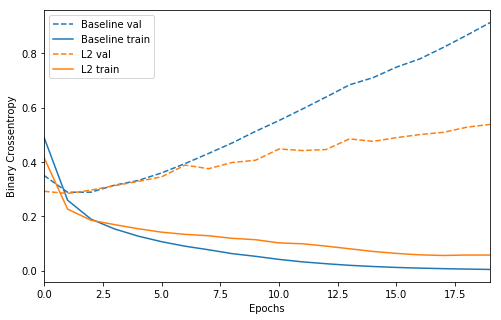

In [31]:
plotHistory([('baseline', baselineHistory),
             ('l2', l2History)])

### Dropout
Dropout *zeroes-out* some of the output features of a given layer. The fraction of the dropped features is the **dropout rate**. At test time, no units are dropped out, but the layer's output values are scaled down by a factor equal to the dropout rate.

In `tensorflow.keras`, dropout is introduced via the `Dropout` layer.

In [32]:
dropoutModel = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(vocabSize,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dropoutModel.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

dropoutHistory = dropoutModel.fit(trainData, trainLabels,
                                  epochs=20,
                                  batch_size=258,
                                  validation_data=(testData, testLabels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6118 - accuracy: 0.6640 - binary_crossentropy: 0.6118 - val_loss: 0.4427 - val_accuracy: 0.8710 - val_binary_crossentropy: 0.4427
Epoch 2/20
25000/25000 - 3s - loss: 0.4392 - accuracy: 0.8170 - binary_crossentropy: 0.4392 - val_loss: 0.3090 - val_accuracy: 0.8835 - val_binary_crossentropy: 0.3090
Epoch 3/20
25000/25000 - 3s - loss: 0.3341 - accuracy: 0.8683 - binary_crossentropy: 0.3341 - val_loss: 0.2817 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2817
Epoch 4/20
25000/25000 - 3s - loss: 0.2736 - accuracy: 0.8967 - binary_crossentropy: 0.2736 - val_loss: 0.2758 - val_accuracy: 0.8878 - val_binary_crossentropy: 0.2758
Epoch 5/20
25000/25000 - 3s - loss: 0.2314 - accuracy: 0.9138 - binary_crossentropy: 0.2314 - val_loss: 0.2894 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2894
Epoch 6/20
25000/25000 - 3s - loss: 0.1983 - accuracy: 0.9248 - binary_crossentropy: 0.1983 - val_loss: 0.3083

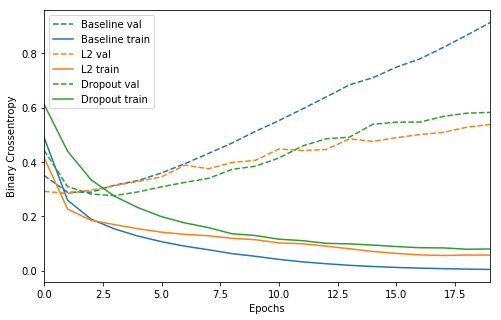

In [33]:
plotHistory([('baseline', baselineHistory),
             ('l2', l2History),
             ('dropout', dropoutHistory)])

To recap, overfitting can be resolved by
- Getting more training data
- Reducing the capacity of the model
- Adding weight regularization
- Adding dropout.

And two more approaches not covered here are
- Data augmentation
- Bach normalization.